In [1]:
#ADVANCED REGRESSION ASSIGNMENT(SURPRISE HOUSING)
# AUTHOR: PRIYANKITH SRIDHAR

In [38]:
#IMPORTING LIBRARIES
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [39]:
#LOADING DATASET
house_df = pd.read_csv(r'E:\Priyankith\Upgrad\train.csv')
house_df.shape

(1460, 81)

In [40]:
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [41]:
house_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [42]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [43]:
# DATA PREPARATION

In [44]:
# Dropping ID variable since it has nothing to do with price

house_df.drop('Id', axis=1, inplace=True)

In [45]:
#Checking for Null_value count in the dataframe
round(house_df.isnull().sum()/len(house_df.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
GarageYrBlt     0.06
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
BsmtQual        0.03
MasVnrArea      0.01
MasVnrType      0.01
dtype: float64

In [46]:
#Dropping columns which have more than 0.1 null_value count
house_df = house_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis='columns')

In [47]:
#Separating object columns with numeric columns
objcols = []
numcols = []

for col in list(house_df):
    if house_df[col].dtypes == 'object':
        objcols.append(col)  
    else:
        numcols.append(col)
print(objcols)

print(numcols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Y

In [49]:
# Replacing NANs in 'GarageFinish','GarageType', 'GarageCond','GarageQual' with 'no garage'
for col in ['GarageFinish','GarageType', 'GarageCond','GarageQual']:
    house_df[col].fillna('No Garage', inplace=True)
house_df['GarageYrBlt'].fillna(0, inplace=True)

In [50]:
#Same procedure for as above, replacing NANs with 'No basement'
for col in ['BsmtFinType2','BsmtExposure', 'BsmtFinType1',  'BsmtQual', 'BsmtCond']:
    house_df[col].fillna('No Basement', inplace=True)

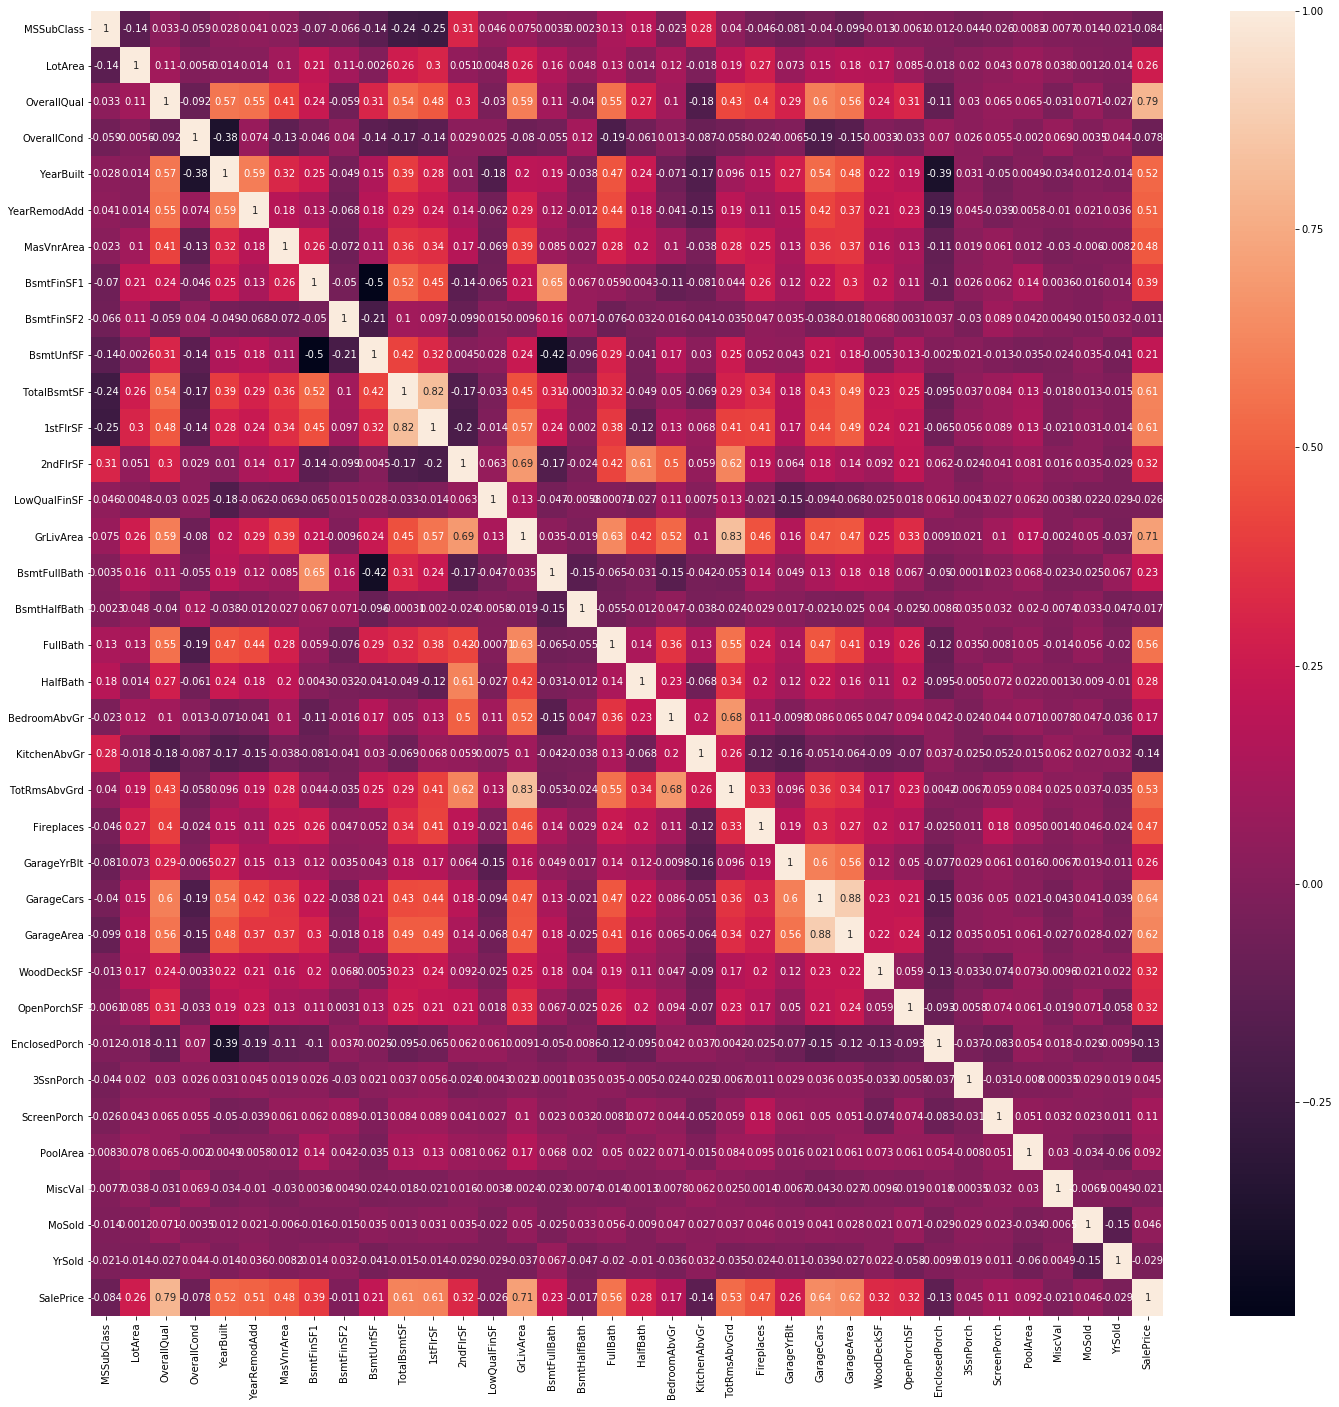

In [51]:
plt.figure(figsize=(24, 24))
sns.heatmap(house_df.corr(), annot = True)

In [52]:
#Isolating high correlating varaibles to drop them
mat = house_df.corr().abs()
upper_triangle = mat.where(np.triu(np.ones(mat.shape), k=1).astype(np.bool))
high_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
high_corr

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [53]:
#Dropping highly correlated variable
house_df.drop(house_df[high_corr], axis=1, inplace = True)
house_df.shape

(1460, 71)

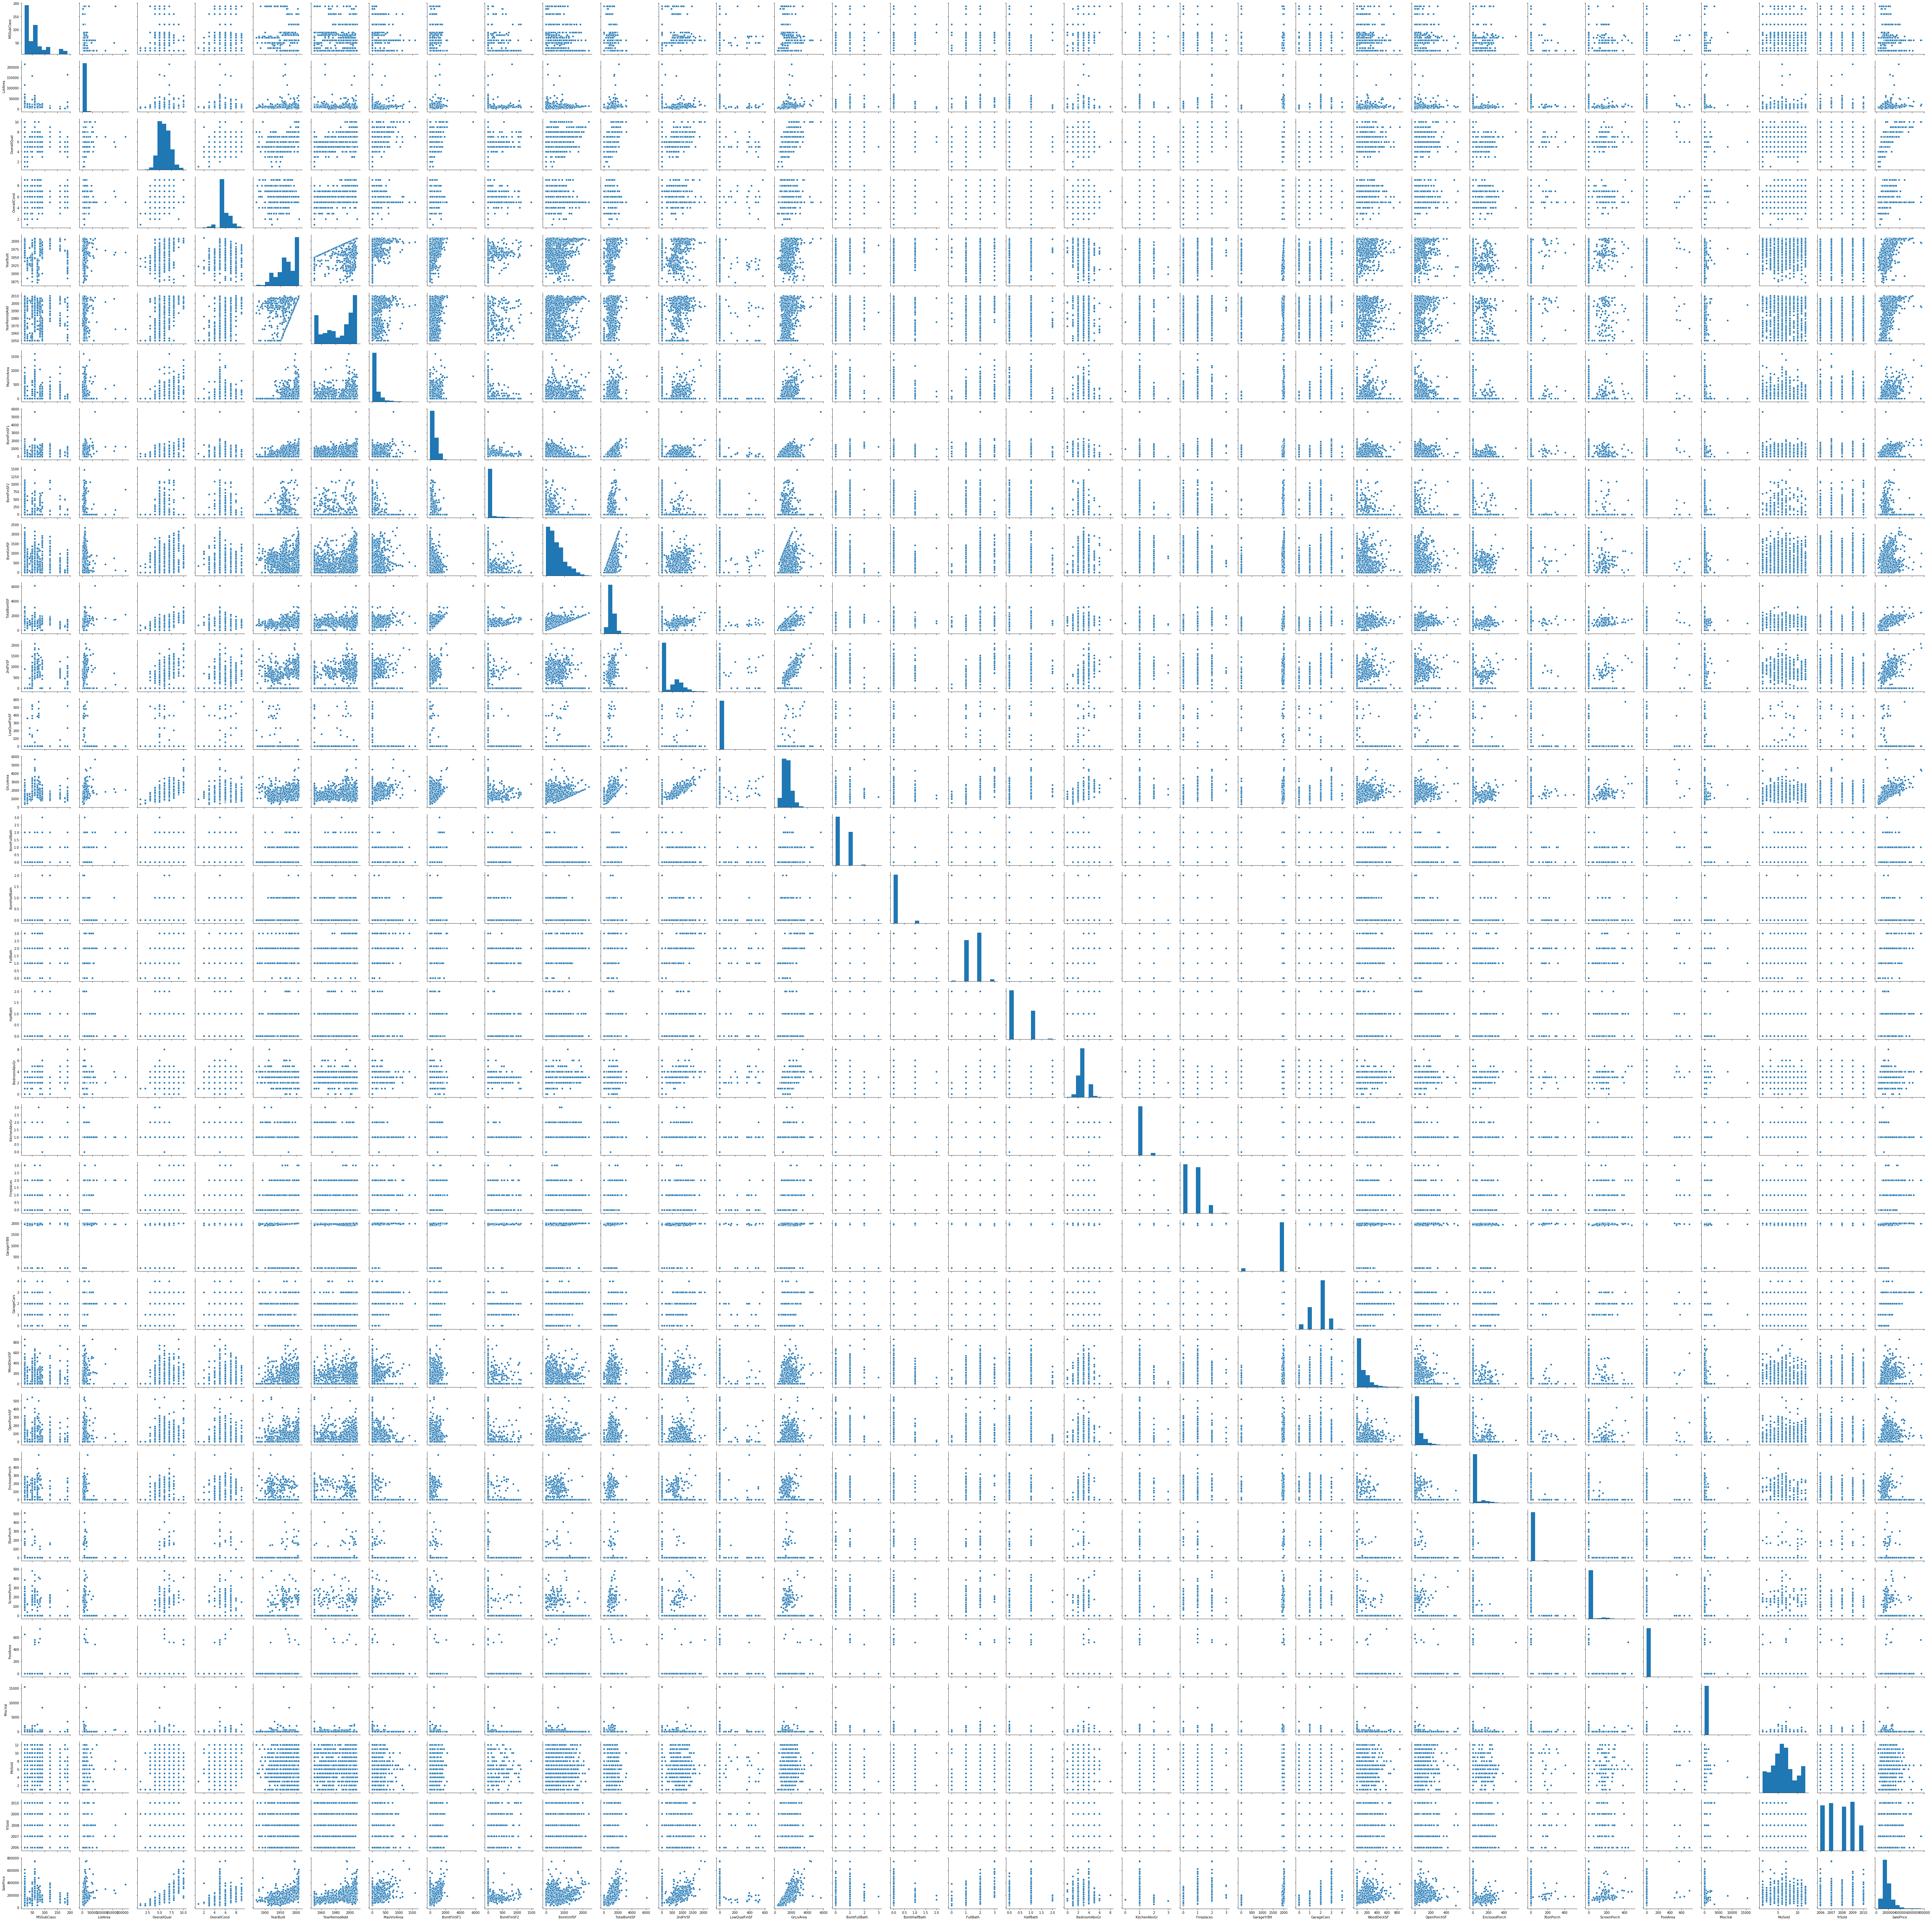

In [33]:
sns.pairplot(house_df[list(house_df)])


In [54]:
#Calculating age of the property as a derived feature
house_df["Age"] = 2020 - house_df['YearBuilt']
house_df.drop(['YearBuilt'], axis = 1, inplace = True)

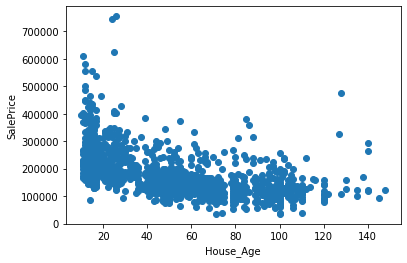

In [55]:
#Plotting to see how the calulated age
plt.scatter(x=house_df['Age'], y=house_df['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice");


In [56]:
#Creating Dummy Variables

#Creating an object list

objcols = []
for col in list(house_df):
    if house_df[col].dtypes == 'object':
        objcols.append(col)  
objcols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [57]:
#Creating Dummies
house_dummy = pd.get_dummies(house_df[objcols], drop_first=True)


In [60]:
df_backup = house_df
df_backup_dum = house_dummy

In [67]:
house_df = df_backup
house_dummy = df_backup_dum

In [68]:
#Concatinating main dataframe with dummy dataframe
house_df = pd.concat([house_df, house_dummy], axis=1)


In [69]:
house_df = house_df.drop(objcols, axis = 1)

In [77]:
house_df.dropna(inplace = True)


In [80]:
#Checking for any missed null values
house_df.isnull().sum() 


MSSubClass                0
LotArea                   0
OverallQual               0
OverallCond               0
YearRemodAdd              0
MasVnrArea                0
BsmtFinSF1                0
BsmtFinSF2                0
BsmtUnfSF                 0
TotalBsmtSF               0
2ndFlrSF                  0
LowQualFinSF              0
GrLivArea                 0
BsmtFullBath              0
BsmtHalfBath              0
FullBath                  0
HalfBath                  0
BedroomAbvGr              0
KitchenAbvGr              0
Fireplaces                0
GarageYrBlt               0
GarageCars                0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch             0
3SsnPorch                 0
ScreenPorch               0
PoolArea                  0
MiscVal                   0
MoSold                    0
                         ..
GarageType_Detchd         0
GarageType_No Garage      0
GarageFinish_No Garage    0
GarageFinish_RFn          0
GarageFinish_Unf    

In [64]:
#Splitting into test and train data

In [81]:
X = house_df.drop('SalePrice', axis=1)
y = house_df['SalePrice']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1016, 237)
X_test Shape: (436, 237)
y_train Shape: (1016,)
y_test Shape: (436,)


In [83]:
#Scaling data accordingly

In [84]:
scaler = StandardScaler()
#Scaling the numerical columns

numcols = []
for col in list(house_df):
    if house_df[col].dtypes != 'object':
        numcols.append(col)  

numcols.remove('SalePrice')
X_train[numcols] = scaler.fit_transform(X_train[numcols])
X_train.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearRemodAdd  \
25     -0.882629  0.323787     1.377064    -0.523510      1.070073   
88     -0.178098 -0.188713    -2.251300    -3.214336     -0.156898   
986    -0.178098 -0.469877    -0.074281     2.167315      0.873758   
1444   -0.882629 -0.186044     0.651391    -0.523510      0.922837   
1108    0.056746 -0.224926    -0.074281    -0.523510      0.726521   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  \
25      3.037013     -0.9861   -0.292862   2.240985     1.221010  ...   
88     -0.567021     -0.9861   -0.292862   0.994534    -0.088100  ...   
986    -0.567021     -0.9861   -0.292862  -0.195568    -1.338028  ...   
1444    0.029897     -0.9861   -0.292862   1.916412     0.880121  ...   
1108   -0.567021     -0.9861   -0.292862   0.793929    -0.298789  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
25          -0.05442       -0.062869     -0.300215     -0.044412     0.394790   
88          -0.05442       -0.062869     -0.300215     -0.044412    -2.532994   
986         -0.05442       -0.062869     -0.300215     -0.044412     0.394790   
1444        -0.05442       -0.062869     -0.300215     -0.044412     0.394790   
1108        -0.05442       -0.062869     -0.300215     -0.044412     0.394790   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
25                -0.062869             -0.089087             -0.109326   
88                -0.062869             -0.089087             -0.109326   
986               -0.062869             -0.089087             -0.109326   
1444              -0.062869             -0.089087             -0.109326   
1108              -0.062869             -0.089087             -0.109326   

      SaleCondition_Normal  SaleCondition_Partial  
25                0.464016              -0.304094  
88               -2.155097              -0.304094  
986               0.464016              -0.304094  
1444              0.464016              -0.304094  
1108             -2.155097              -0.304094  

[5 rows x 237 columns]

In [85]:
X_test[numcols] = scaler.transform(X_test[numcols])
X_test.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearRemodAdd  \
157     0.056746  0.125638     1.377064    -0.523510      1.217310   
337    -0.882629 -0.129544     0.651391    -0.523510      0.873758   
1120   -0.647785 -0.207131    -0.074281    -0.523510     -1.727421   
563    -0.178098  0.995554    -0.074281     1.270373     -1.727421   
371    -0.178098  0.580927    -1.525627    -1.420452     -1.285711   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  \
157    -0.093992   -0.986100   -0.292862   0.455832    -0.653882  ...   
337     0.069316    0.862097   -0.292862   0.347641     1.149992  ...   
1120   -0.567021   -0.986100   -0.292862   0.992280    -0.090467  ...   
563    -0.567021   -0.986100   -0.292862   1.332631     0.266993  ...   
371    -0.567021   -0.986100   -0.292862  -1.288749    -2.486162  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
157         -0.05442       -0.062869      3.330952     -0.044412    -2.532994   
337         -0.05442       -0.062869     -0.300215     -0.044412     0.394790   
1120        -0.05442       -0.062869     -0.300215     -0.044412     0.394790   
563         -0.05442       -0.062869     -0.300215     -0.044412     0.394790   
371         -0.05442       -0.062869     -0.300215     -0.044412     0.394790   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
157               -0.062869             -0.089087             -0.109326   
337               -0.062869             -0.089087             -0.109326   
1120              -0.062869             -0.089087             -0.109326   
563               -0.062869             -0.089087             -0.109326   
371               -0.062869             -0.089087             -0.109326   

      SaleCondition_Normal  SaleCondition_Partial  
157              -2.155097               3.288458  
337               0.464016              -0.304094  
1120              0.464016              -0.304094  
563               0.464016              -0.304094  
371               0.464016              -0.304094  

[5 rows x 237 columns]

In [75]:
#MODEL BUILDING

In [86]:
#Ridge Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.057165      0.090367         0.002998    2.000141e-03      0.0001   
1       0.008596      0.001199         0.001597    4.897480e-04       0.001   
2       0.011793      0.001468         0.001998    4.156970e-07        0.01   
3       0.010992      0.000632         0.001399    4.895328e-04        0.05   
4       0.007597      0.000798         0.001398    4.884840e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -20523.174600      -18649.048074      -18306.810387   
1   {'alpha': 0.001}      -20522.382992      -18647.700035      -18306.764042   
2    {'alpha': 0.01}      -20515.027080      -18634.587707      -18306.252315   
3    {'alpha': 0.05}      -20487.221631      -18583.170711      -18303.123383   
4     {'alpha': 0.1}      -20461.108178      -18539.236642      -18298.103546   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -17284.559537  ...    -18655.871569     1051.021822               27   
1      -17284.001054  ...    -18655.278325     1050.896206               26   
2      -17278.445448  ...    -18649.538154     1049.843131               25   
3      -17254.396232  ...    -18626.522775     1046.920394               24   
4      -17226.104929  ...    -18603.998452     1046.008377               23   

   split0_train_score  split1_train_score  split2_train_score  \
0       -11616.501111       -12710.822926       -12559.508924   
1       -11616.566349       -12710.706784       -12559.461972   
2       -11617.240097       -12709.578703       -12559.005986   
3       -11620.490659       -12706.224079       -12557.580084   
4       -11623.800647       -12703.852829       -12556.333305   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -13110.732065       -12180.775663     -12435.668138       506.510177  
1       -13110.740340       -12180.744369     -12435.643963       506.479519  
2       -13110.823467       -12180.435462     -12435.416743       506.170288  
3       -13111.195169       -12179.139474     -12434.925893       504.919465  
4       -13111.674710       -12177.656035     -12434.663505       503.817828  

[5 rows x 21 columns]

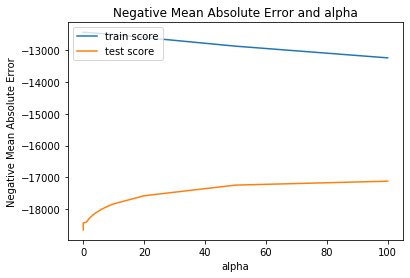

In [88]:
# plotting mean of test and train scores vs alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [108]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.54331775e+03,  8.59206466e+03,  1.01931322e+04,  6.31409267e+03,
        2.74175945e+03,  3.77693802e+03,  8.34459817e+03,  6.93652457e+02,
        1.85457687e+03,  1.08647903e+04,  8.73492658e+03, -1.43569866e+03,
        2.19217419e+04,  2.24651601e+03, -9.50031382e+02,  1.98339848e+03,
        1.96344013e+03, -2.29248642e+03, -3.03236756e+03,  1.39674602e+03,
        4.60077090e+02,  5.62317423e+03,  1.32230461e+03,  3.70590230e+02,
       -2.98954182e+02,  1.61299978e+03, -6.26464827e+01,  3.37387979e+03,
        3.58941348e+02, -5.87730178e+01,  2.39946324e+02, -7.86567518e+03,
        4.30351599e+03,  4.02361571e+02,  4.44495183e+03,  1.86603130e+03,
        2.18331327e+03,  1.61742773e+01,  2.22647972e+02, -1.52296333e+02,
        2.25727282e+02, -2.95020447e+03, -1.29713435e+02, -4.72784152e+02,
        1.70349196e+03, -1.92811297e+03, -8.94629456e+02, -8.18947550e+02,
        1.13792923e+03, -4.31778835e+03,  4.13377809e+01,  4.48124379e+02,
        1.05819568e+03, -

In [90]:
#Lasso Regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   25.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.217065      0.021212         0.001799        0.000400      0.0001   
1       0.211268      0.012283         0.001399        0.000490       0.001   
2       0.205472      0.010065         0.001600        0.000491        0.01   
3       0.206670      0.015642         0.001400        0.000489        0.05   
4       0.238452      0.022244         0.001398        0.000489         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -20457.894416      -18525.461412      -18304.225146   
1   {'alpha': 0.001}      -20457.873349      -18525.376908      -18304.195106   
2    {'alpha': 0.01}      -20457.662668      -18524.532024      -18303.894724   
3    {'alpha': 0.05}      -20456.726123      -18520.776964      -18302.560764   
4     {'alpha': 0.1}      -20455.482650      -18516.086201      -18300.982188   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -17217.941451  ...    -18596.620184     1047.258917               28   
1      -17217.911815  ...    -18596.588285     1047.261878               27   
2      -17217.615384  ...    -18596.240281     1047.295093               26   
3      -17216.464471  ...    -18594.722004     1047.400175               25   
4      -17217.150221  ...    -18593.252591     1046.944202               24   

   split0_train_score  split1_train_score  split2_train_score  \
0       -11628.202105       -12707.786022       -12557.776986   
1       -11628.201034       -12707.779700       -12557.772669   
2       -11628.191054       -12707.716499       -12557.742917   
3       -11628.172161       -12707.441804       -12557.641739   
4       -11628.233975       -12707.156466       -12557.512251   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -13113.568015       -12179.547732     -12437.376172       503.207994  
1       -13113.564428       -12179.544189     -12437.372404       503.206852  
2       -13113.537524       -12179.511296     -12437.339858       503.197985  
3       -13113.463413       -12179.407598     -12437.225343       503.160414  
4       -13113.424140       -12179.288096     -12437.122986       503.105390  

[5 rows x 21 columns]

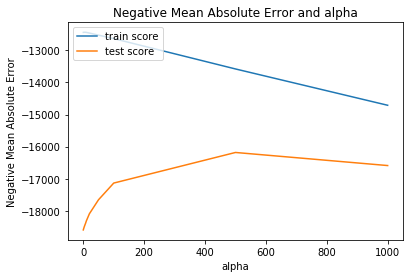

In [92]:
# plotting mean of test and train scores vs alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [109]:
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=200, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
lasso.coef_


array([-3.68161934e+03,  8.03036696e+03,  1.05568265e+04,  6.53640092e+03,
        2.62908691e+03,  3.56478843e+03,  6.33581729e+03,  1.74286462e+02,
       -0.00000000e+00,  1.07074584e+04,  2.74274892e+03, -1.94895805e+03,
        2.74946053e+04,  1.83341588e+03, -8.42074713e+02,  5.31298870e+02,
        1.07443779e+03, -2.70844925e+03, -3.13837434e+03,  8.88183405e+02,
       -0.00000000e+00,  4.98763542e+03,  1.38310592e+03,  3.48895630e+02,
       -0.00000000e+00,  1.33726007e+03,  0.00000000e+00,  3.19946552e+03,
        1.65365431e+02,  0.00000000e+00,  2.08532957e+02, -9.63909038e+03,
        3.10787064e+03, -0.00000000e+00,  2.23300522e+03, -0.00000000e+00,
        1.85338073e+03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.15941476e+02, -1.88389036e+03,  0.00000000e+00, -3.66540130e+02,
        1.61396850e+03, -1.17609786e+03, -6.00357422e+02, -1.17010423e+02,
        3.81353562e+02, -4.04838684e+03,  0.00000000e+00,  7.20351014e+01,
        1.48297457e+03, -

In [111]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)
#y_pred_ridge_test = ridge.predict(X_test)

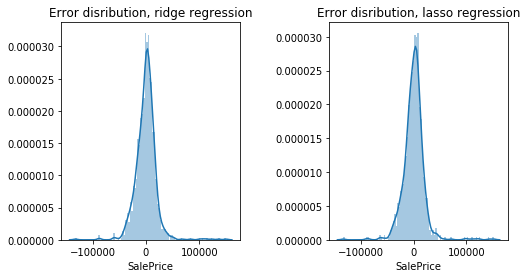

In [112]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [113]:
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score for ridge: 0.9380040323651593
r2_score for lasso: 0.9350739656320585


In [114]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)


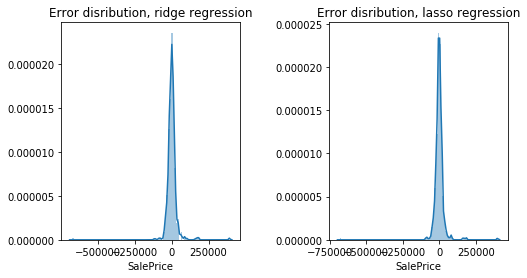

In [115]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [116]:
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score for ridge: 0.94
r2_score for lasso: 0.94
r2_score in test dataset:
r2_score for ridge: 0.69
r2_score for lasso: 0.7


In [101]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 180039.409),
 ('MSSubClass', -3049.056),
 ('LotArea', 8766.142),
 ('OverallQual', 10052.048),
 ('OverallCond', 6625.449),
 ('YearRemodAdd', 2443.939),
 ('MasVnrArea', 3464.533),
 ('BsmtFinSF1', 6699.96),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 10879.376),
 ('2ndFlrSF', 5441.28),
 ('LowQualFinSF', -1813.396),
 ('GrLivArea', 26694.823),
 ('BsmtFullBath', 1862.924),
 ('BsmtHalfBath', -971.485),
 ('FullBath', 783.988),
 ('HalfBath', 1101.086),
 ('BedroomAbvGr', -2850.084),
 ('KitchenAbvGr', -3295.235),
 ('Fireplaces', 860.974),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 5133.302),
 ('WoodDeckSF', 1285.375),
 ('OpenPorchSF', 302.363),
 ('EnclosedPorch', -74.492),
 ('3SsnPorch', 1457.19),
 ('ScreenPorch', -0.0),
 ('PoolArea', 3206.088),
 ('MiscVal', 315.532),
 ('MoSold', 0.0),
 ('YrSold', 217.592),
 ('Age', -10076.669),
 ('MSZoning_FV', 3578.254),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 2492.873),
 ('MSZoning_RM', 0.0),
 ('Street_Pave', 2206.378),
 ('LotShape

In [104]:
#Identifying important features, excluding dummies
final_var_list = []
for i in list(house_df):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print(final_var_list)
print(len(final_var_list))

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', 'Age', 'MSZoning_FV', 'MSZoning_RL', 'Street_Pave', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', '

In [ ]:
#RESULTS:
"""
1. Optimum alpha value for ridge is 10
2. Optimum alpha value for lasso is 100
3. The best variables for the company are in the above set and they can use the varaiables with positive coeffs to get the best values

"""